Library

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neural_network._multilayer_perceptron import MLPClassifier


# Read Data, EDA And Preprocessing

In [46]:
df = pd.read_csv("dataset.csv")
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [47]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [48]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [49]:
df.duplicated().sum()

0

In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [51]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [52]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

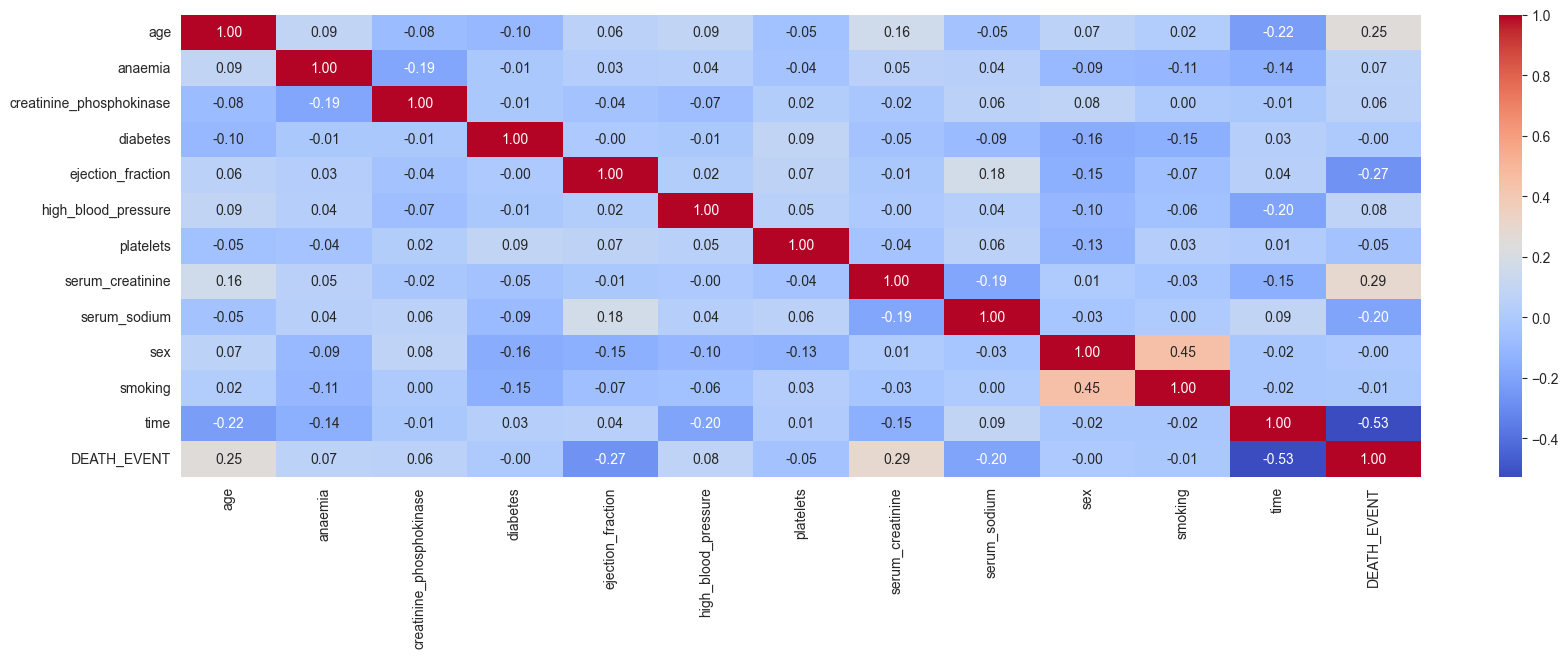

In [53]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

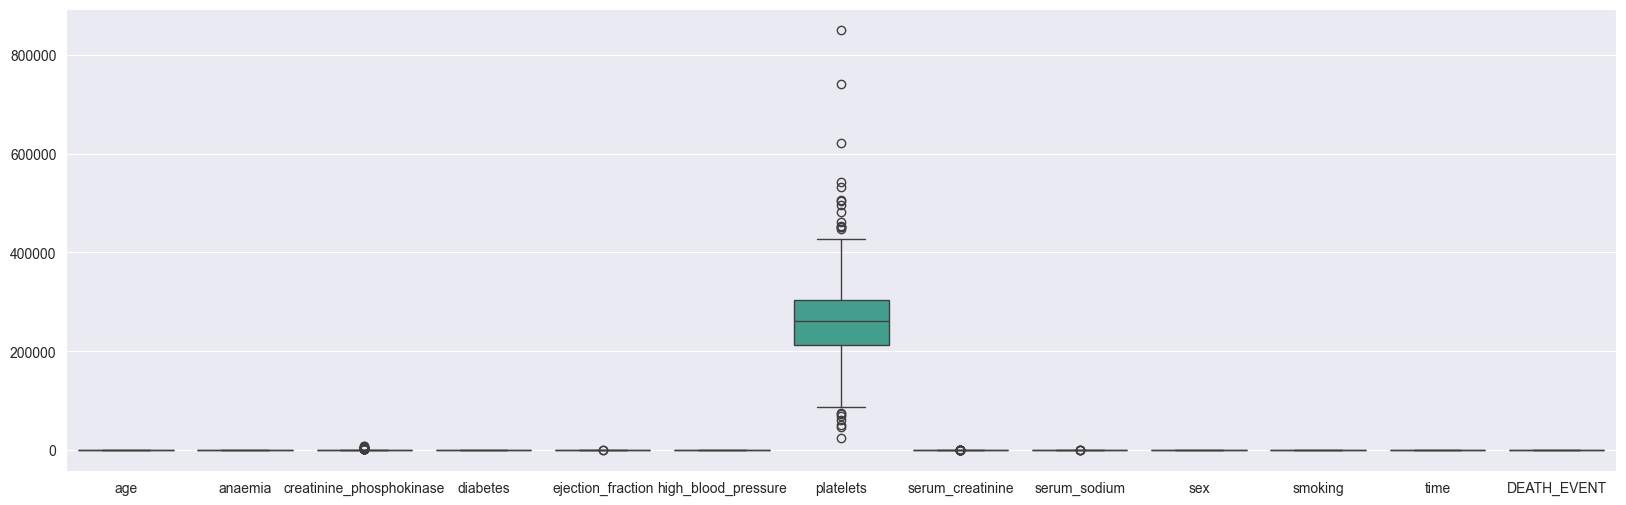

In [54]:
plt.figure(figsize = (20,6))
sns.boxplot(df)
plt.show()

In [55]:
outliers = []
def detect_outlier(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

platelets = np.array(df['platelets'])
check_oulier = detect_outlier(platelets)

In [56]:
print(platelets)

[265000.   263358.03 162000.   210000.   327000.   204000.   127000.
 454000.   263358.03 388000.   368000.   253000.   136000.   276000.
 427000.    47000.   262000.   166000.   237000.    87000.   276000.
 297000.   289000.   368000.   263358.03 149000.   196000.   284000.
 153000.   200000.   263358.03 360000.   319000.   302000.   188000.
 228000.   226000.   321000.   305000.   329000.   263358.03 153000.
 185000.   218000.   194000.   310000.   271000.   451000.   140000.
 395000.   166000.   418000.   263358.03 351000.   255000.   461000.
 223000.   216000.   319000.   254000.   390000.   216000.   254000.
 385000.   263358.03 119000.   213000.   274000.   244000.   497000.
 374000.   122000.   243000.   149000.   266000.   204000.   317000.
 237000.   283000.   324000.   293000.   263358.03 196000.   172000.
 302000.   406000.   173000.   304000.   235000.   181000.   249000.
 297000.   263358.03 210000.   327000.   219000.   254000.   255000.
 318000.   221000.   298000.   263

In [57]:
# Mencari lower bound dan upperbound data salary

Q1 = df["platelets"].quantile(0.25)
Q3 = df["platelets"].quantile(0.75)

IQR = Q3-Q1

upper_bound = Q3 + (1.5)*IQR
lower_bound = Q1 - (1.5)*IQR

print(Q1, 1.5*IQR)

print(lower_bound, upper_bound)

212500.0 136500.0
76000.0 440000.0


In [58]:
df = df.loc[~((df["platelets"]>upper_bound) | (df["platelets"]<lower_bound)), :]

#data_baru = data[:][~((data["salary"]>upper_bound) | (data["salary"]<lower_bound))]

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


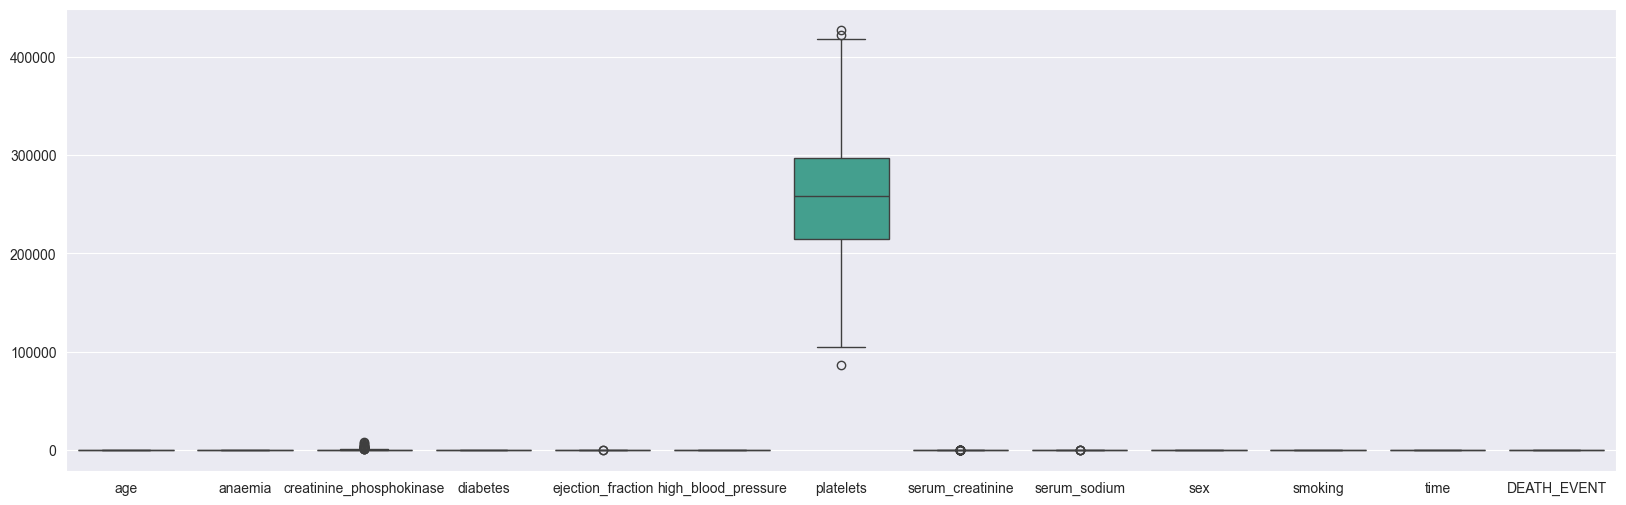

In [59]:
plt.figure(figsize=(20,6))
sns.boxplot(df)
plt.show()

In [60]:
y = df['DEATH_EVENT']

In [61]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<Axes: xlabel='anaemia', ylabel='DEATH_EVENT'>

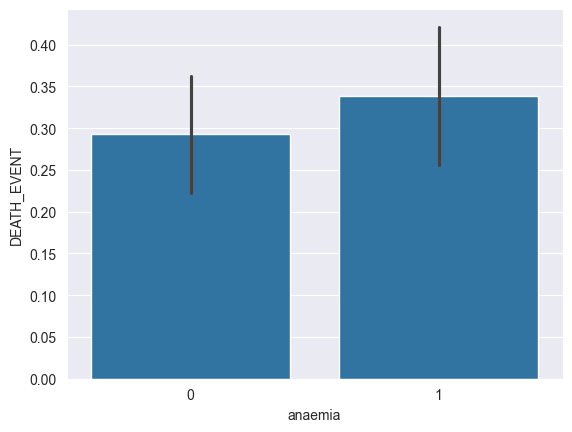

In [62]:
sns.barplot(x=df['anaemia'],y=y)

<Axes: xlabel='age', ylabel='DEATH_EVENT'>

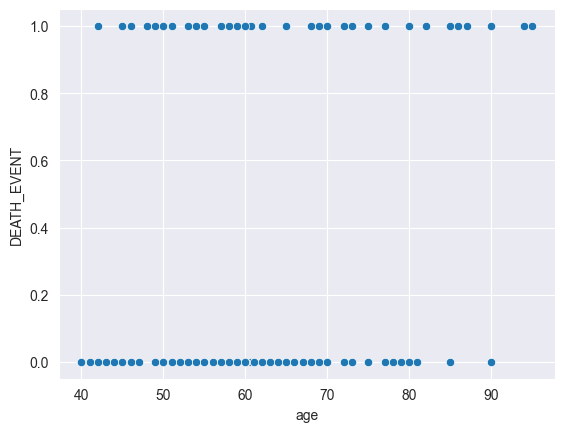

In [63]:
sns.scatterplot(x=df['age'],y=y)

C:\Users\User\AppData\Local\Temp\ipykernel_17516\2893847880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DEATH_EVENT'])


<Axes: xlabel='DEATH_EVENT', ylabel='Density'>

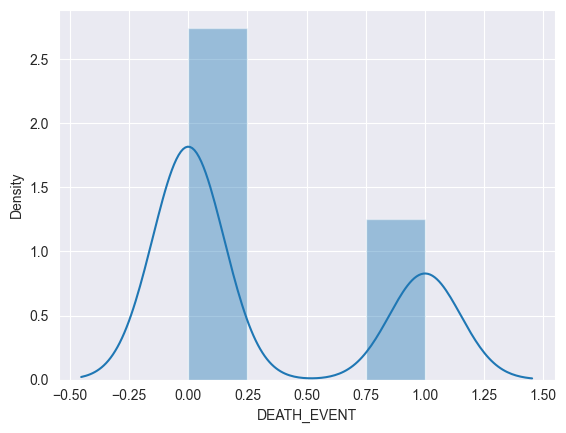

In [64]:
sns.distplot(df['DEATH_EVENT'])

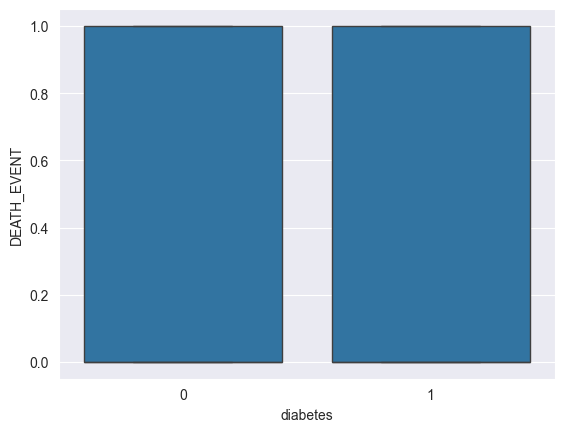

In [65]:
sns.boxplot(x=df['diabetes'],y=y,data=df)
plt.show()

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

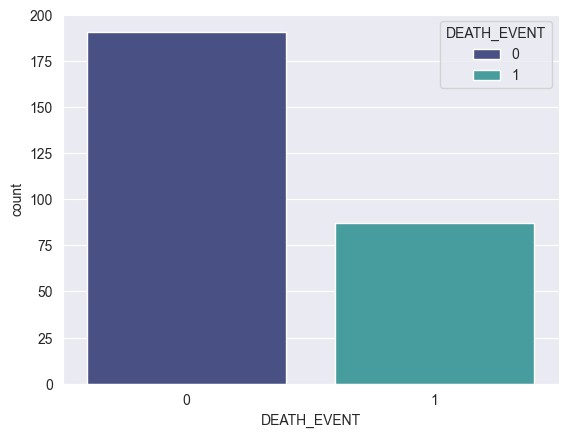

In [66]:
sns.countplot(x=df['DEATH_EVENT'],data=df,hue="DEATH_EVENT",palette="mako")

<Axes: xlabel='ejection_fraction', ylabel='age'>

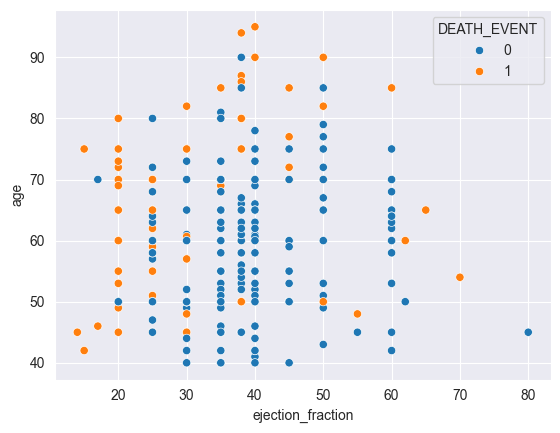

In [67]:
sns.scatterplot(x=df['ejection_fraction'],y=df['age'],hue="DEATH_EVENT",data=df)

<Axes: xlabel='sex', ylabel='time'>

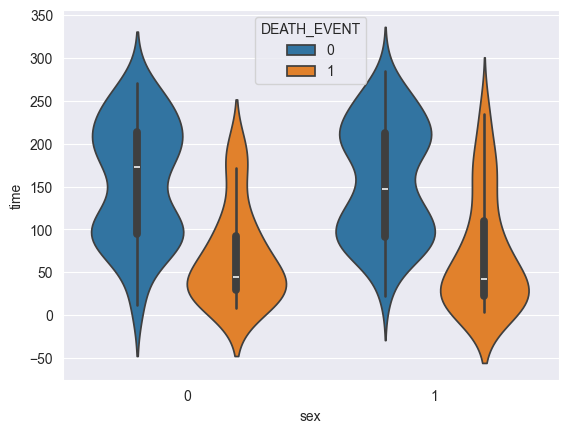

In [68]:
sns.violinplot(y=df['time'],x=df['sex'],hue='DEATH_EVENT',data=df)

<Axes: xlabel='smoking', ylabel='age'>

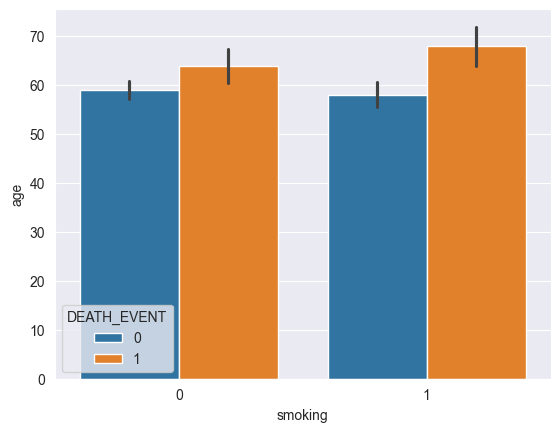

In [69]:
sns.barplot(x=df['smoking'],y=df['age'],hue='DEATH_EVENT',data=df)

In [70]:
df['DEATH_EVENT']

0      1
1      1
2      1
3      1
4      1
      ..
293    0
294    0
295    0
297    0
298    0
Name: DEATH_EVENT, Length: 278, dtype: int64

<Axes: xlabel='high_blood_pressure', ylabel='smoking'>

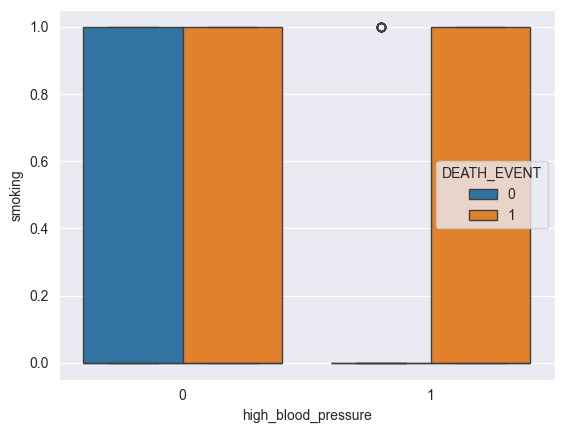

In [71]:
sns.boxplot(x=df['high_blood_pressure'],y=df['smoking'],hue='DEATH_EVENT',data=df)

In [72]:
df['smoking'].unique()

array([0, 1], dtype=int64)

In [73]:
print(df.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


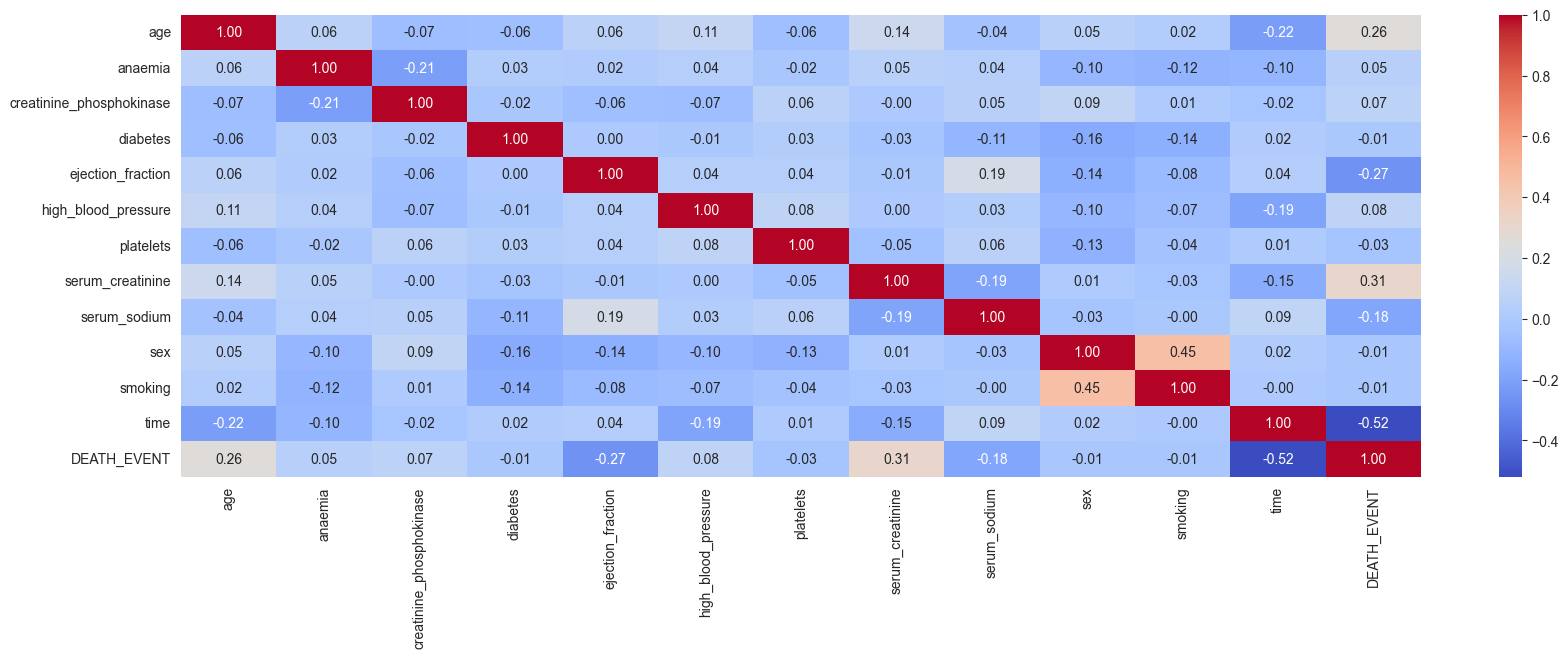

In [74]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [75]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.063633,-0.065388,-0.062015,0.062545,0.105009,-0.058909,0.141339,-0.040125,0.052015,0.021006,-0.218034,0.256207
anaemia,0.063633,1.000000,-0.211980,0.026833,0.016565,0.039205,-0.017200,0.053256,0.044037,-0.103215,-0.120329,-0.104771,0.049023
creatinine_phosphokinase,-0.065388,-0.211980,1.000000,-0.015442,-0.057895,-0.068058,0.064251,-0.002190,0.048308,0.092529,0.011543,-0.022461,0.070974
diabetes,-0.062015,0.026833,-0.015442,1.000000,0.000312,-0.006996,0.029641,-0.032393,-0.107902,-0.162440,-0.144047,0.018698,-0.005738
ejection_fraction,0.062545,0.016565,-0.057895,0.000312,1.000000,0.042261,0.039555,-0.006970,0.187966,-0.144158,-0.081530,0.038000,-0.266685
high_blood_pressure,0.105009,0.039205,-0.068058,-0.006996,0.042261,1.000000,0.084432,0.001456,0.027297,-0.100375,-0.074465,-0.192923,0.081753
platelets,-0.058909,-0.017200,0.064251,0.029641,0.039555,0.084432,1.000000,-0.046285,0.056421,-0.128942,-0.040259,0.010754,-0.032195
serum_creatinine,0.141339,0.053256,-0.002190,-0.032393,-0.006970,0.001456,-0.046285,1.000000,-0.188240,0.010309,-0.026213,-0.154227,0.306787
serum_sodium,-0.040125,0.044037,0.048308,-0.107902,0.187966,0.027297,0.056421,-0.188240,1.000000,-0.031356,-0.003983,0.090941,-0.182534
sex,0.052015,-0.103215,0.092529,-0.162440,-0.144158,-0.100375,-0.128942,0.010309,-0.031356,1.000000,0.453824,0.015427,-0.010480


In [76]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    191
1     87
Name: count, dtype: int64

In [77]:
df = df.sample(frac=1).reset_index(drop=True)

In [78]:
# Menghitung korelasi antara fitur-fitur dan kolom 'DEATH_EVENT'
corr_with_target = df.corrwith(df['DEATH_EVENT'])

# Menghapus korelasi yang nilainya kurang dari 0.1 atau lebih besar dari -0.1
filtered_corr_with_target = corr_with_target[(corr_with_target >= 0.1) | (corr_with_target <= -0.1)]

# Menampilkan korelasi yang telah difilter
print("Filtered Correlation with DEATH_EVENT:")
print(filtered_corr_with_target)


Filtered Correlation with DEATH_EVENT:
age                  0.256207
ejection_fraction   -0.266685
serum_creatinine     0.306787
serum_sodium        -0.182534
time                -0.519846
DEATH_EVENT          1.000000
dtype: float64


In [79]:
scaled_df_mod = df[filtered_corr_with_target.keys()]

In [80]:
binary_columns = [col for col in scaled_df_mod.columns if set(df[col]) == {0, 1}]

# Memilih fitur-fitur yang bukan boolean
non_binary_columns = [col for col in scaled_df_mod.columns if col not in binary_columns]

# Penskalaan fitur-fitur yang bukan boolean
scaler = StandardScaler()
scaled_features = scaler.fit_transform(scaled_df_mod[non_binary_columns])

# Membuat DataFrame baru dengan fitur-fitur yang bukan boolean yang sudah discaling
scaled_df = pd.DataFrame(scaled_features, columns=non_binary_columns)

# Menggabungkan fitur-fitur yang bukan boolean yang sudah discaling dengan fitur-fitur boolean dan lainnya
scaled_df = pd.concat([scaled_df, scaled_df_mod[binary_columns]], axis=1)

# Menampilkan hasil penskalaan
print(scaled_df)


          age  ejection_fraction  serum_creatinine  serum_sodium      time  \
0    0.802828          -1.773310         -0.369896     -0.144266  0.768982   
1   -0.985614          -0.672530         -0.369896      0.303845 -1.522136   
2   -0.900450          -0.672530         -0.654118      0.976012 -0.220365   
3    0.802828           1.867732         -0.275156      1.872235  0.222238   
4   -0.644958           1.867732         -0.559377     -0.368322 -1.391959   
..        ...                ...               ...           ...       ...   
273 -1.326269           1.444355         -0.559377      0.976012  1.667204   
274  0.802828           0.597601         -0.180416      0.527901 -1.248764   
275  0.377008           0.174224         -0.369896     -0.144266  1.055371   
276 -0.900450          -1.095907          0.198546     -0.144266 -0.506754   
277  0.802828          -0.249153          1.240690      0.303845 -0.975392   

     DEATH_EVENT  
0              0  
1              0  
2     

In [81]:
scaled_df

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,0.802828,-1.773310,-0.369896,-0.144266,0.768982,0
1,-0.985614,-0.672530,-0.369896,0.303845,-1.522136,0
2,-0.900450,-0.672530,-0.654118,0.976012,-0.220365,0
3,0.802828,1.867732,-0.275156,1.872235,0.222238,0
4,-0.644958,1.867732,-0.559377,-0.368322,-1.391959,0
...,...,...,...,...,...,...
273,-1.326269,1.444355,-0.559377,0.976012,1.667204,0
274,0.802828,0.597601,-0.180416,0.527901,-1.248764,1
275,0.377008,0.174224,-0.369896,-0.144266,1.055371,0
276,-0.900450,-1.095907,0.198546,-0.144266,-0.506754,0


In [82]:


X = scaled_df.drop(["DEATH_EVENT"], axis=1)
y = scaled_df['DEATH_EVENT']

X_resample, y_resample = ADASYN(random_state=42).fit_resample(X, y)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size = 0.2, random_state=42)



# Train Model

In [99]:
base_models = {
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42,max_depth=None,min_samples_leaf=1,min_samples_split=2),
    "Logistic": LogisticRegression(max_iter=1000, random_state=42,C=100,penalty='l1',solver='liblinear'),
    "KNeighbors": KNeighborsClassifier(n_neighbors=3,algorithm='auto',weights='distance'),
    "DecisionTree": DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=4,min_samples_split=10,splitter='random'),
    "MLRClassifier": MLPClassifier(activation='relu',alpha=0.0001,hidden_layer_sizes=300,max_iter=1000,random_state=42),
    "SVC": SVC(C=1,coef0=1,degree=5,gamma='scale',kernel='poly')
}

RandomForest Accuracy: 92.41%


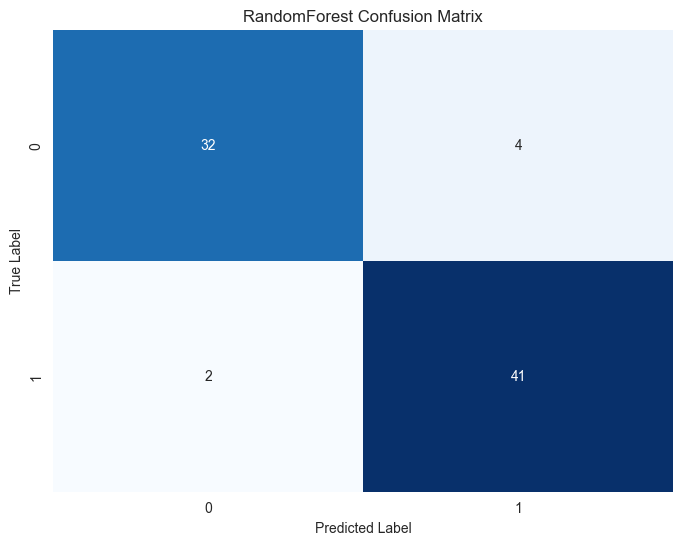

Logistic Accuracy: 81.01%


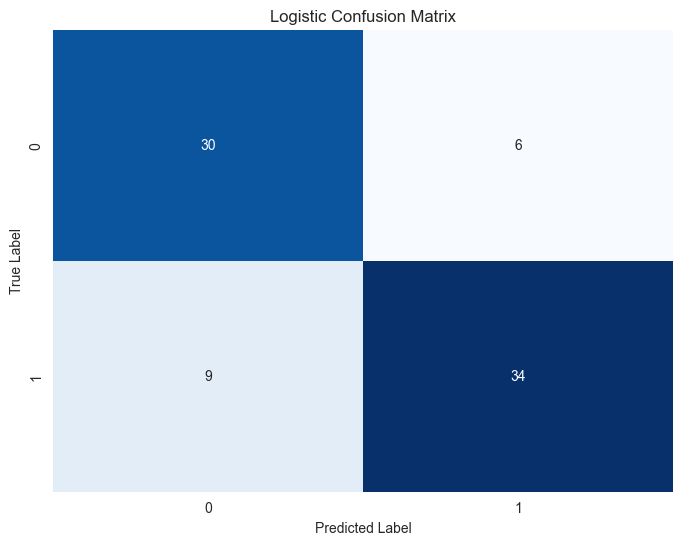

KNeighbors Accuracy: 89.87%


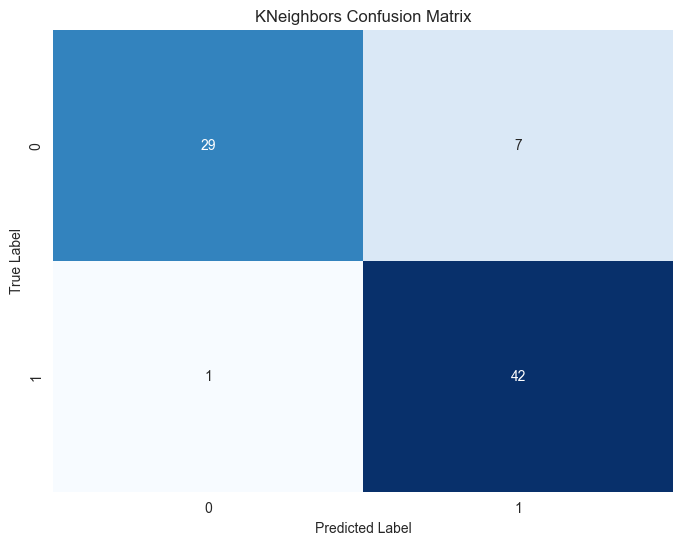

DecisionTree Accuracy: 89.87%


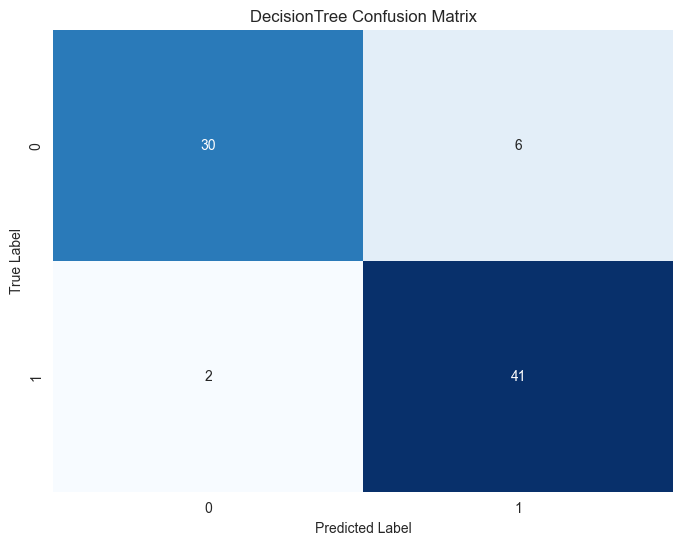

MLRClassifier Accuracy: 93.67%


E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


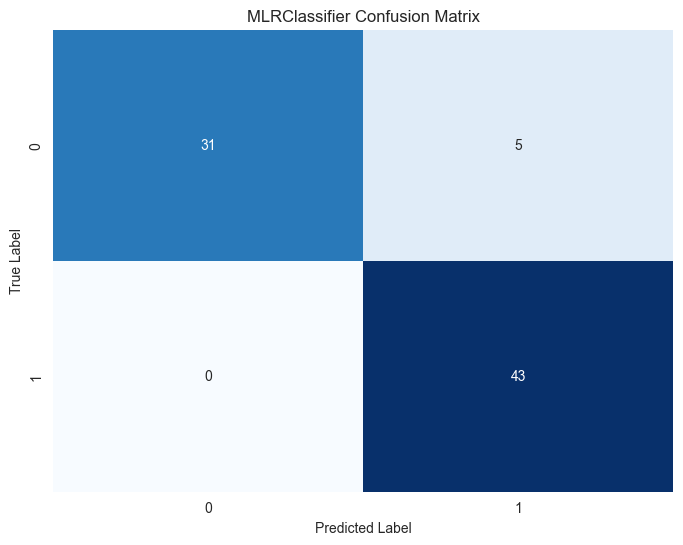

SVC Accuracy: 89.87%


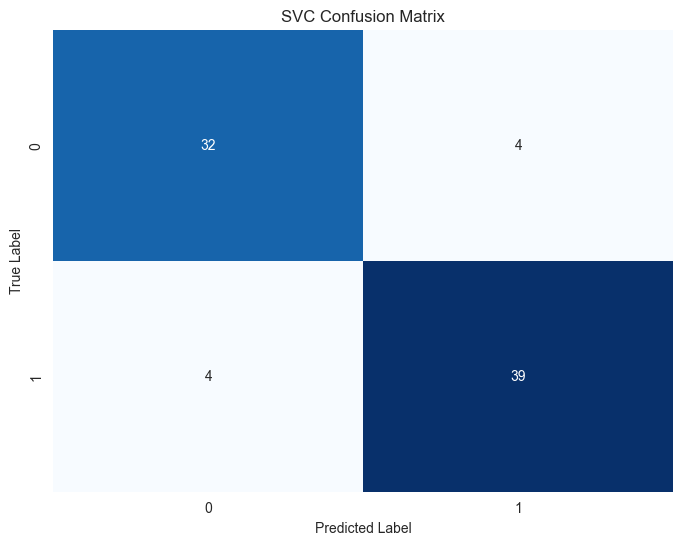

In [100]:

accuracies = {}

for name, model in base_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    cm = confusion_matrix(y_test, y_pred)
    file = open(f"{name}.pickle","wb")
    pickle.dump(model,file)
    file.close()
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [86]:
param_grids = {
    "RandomForest": {
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4]
    },
    "Logistic": {
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [0.1, 1, 10, 100],
        'clf__solver': ['liblinear', 'saga', 'lbfgs'],
        'clf__l1_ratio': [0.5]  # l1_ratio is used only if penalty is 'elasticnet'
    },
    "KNeighbors": {
        'clf__n_neighbors': [3, 5, 7, 9],
        'clf__weights': ['uniform', 'distance'],
        'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    "DecisionTree": {
        'clf__criterion': ['gini', 'entropy'],
        'clf__splitter': ['best', 'random'],
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4]
    },
    "MLPClassifier": {
        'clf__hidden_layer_sizes': [(50,), (150,), (250,), (300,)],
        'clf__activation': ['logistic', 'tanh', 'relu'],
        'clf__alpha': [0.0001, 0.001, 0.01],
        'clf__max_iter': [100, 500 , 1000]
    },
    "SVC": {
        'clf__C': [0.1, 1, 10, 100],
        'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'clf__gamma': ['scale', 'auto'],
        'clf__degree': [3, 4, 5],
        'clf__coef0': [0.0, 0.1, 0.5, 1.0]
    }
}


In [87]:
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "Logistic": LogisticRegression(max_iter=1000),
    "KNeighbors": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "MLPClassifier": MLPClassifier(),
    "SVC": SVC()
}

In [88]:
best_estimators = {}
best_scores = {}

for clf_name, clf in classifiers.items():
    pipeline = Pipeline([
        ('clf', clf)
    ])
    grid_search = GridSearchCV(pipeline, param_grids[clf_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_estimators[clf_name] = grid_search.best_estimator_
    best_scores[clf_name] = grid_search.best_score_
    print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {clf_name}: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for RandomForest: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 300}
Best cross-validation score for RandomForest: 0.8921
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Logistic: {'clf__C': 100, 'clf__l1_ratio': 0.5, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best cross-validation score for Logistic: 0.7810
Fitting 5 folds for each of 32 candidates, totalling 160 fits


E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\s

Best parameters for KNeighbors: {'clf__algorithm': 'auto', 'clf__n_neighbors': 3, 'clf__weights': 'distance'}
Best cross-validation score for KNeighbors: 0.8571
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for DecisionTree: {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 10, 'clf__splitter': 'random'}
Best cross-validation score for DecisionTree: 0.8413
Fitting 5 folds for each of 108 candidates, totalling 540 fits


E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for MLPClassifier: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (300,), 'clf__max_iter': 1000}
Best cross-validation score for MLPClassifier: 0.8698
Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best parameters for SVC: {'clf__C': 1, 'clf__coef0': 1.0, 'clf__degree': 5, 'clf__gamma': 'scale', 'clf__kernel': 'poly'}
Best cross-validation score for SVC: 0.8540


In [101]:
for clf_name, best_score in best_scores.items():
    print(f"Best accuracy for {clf_name}: {best_score:.4f}")
    print()

Best accuracy for RandomForest: 0.8921

Best accuracy for Logistic: 0.7810

Best accuracy for KNeighbors: 0.8571

Best accuracy for DecisionTree: 0.8413

Best accuracy for MLPClassifier: 0.8698

Best accuracy for SVC: 0.8540



In [102]:


for clf_name, best_estimator in best_estimators.items():
    y_pred = best_estimator.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    r1 = f1_score(y_test,y_pred)
    print(f"Test set accuracy for {clf_name}: {test_accuracy:.4f}")
    print(f"Test set F1_Score for {clf_name}: {r1:.4f}")
    print()


Test set accuracy for RandomForest: 0.9241
Test set F1_Score for RandomForest: 0.9318

Test set accuracy for Logistic: 0.8101
Test set F1_Score for Logistic: 0.8193

Test set accuracy for KNeighbors: 0.8987
Test set F1_Score for KNeighbors: 0.9130

Test set accuracy for DecisionTree: 0.8608
Test set F1_Score for DecisionTree: 0.8817

Test set accuracy for MLPClassifier: 0.9367
Test set F1_Score for MLPClassifier: 0.9451

Test set accuracy for SVC: 0.8987
Test set F1_Score for SVC: 0.9070



In [103]:
from sklearn.metrics import classification_report, confusion_matrix

for clf_name, best_estimator in best_estimators.items():
    y_pred = best_estimator.predict(X_test)
    print(f"Classification report for {clf_name}:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion matrix for {clf_name}:\n{confusion_matrix(y_test, y_pred)}\n")


Classification report for RandomForest:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.91      0.95      0.93        43

    accuracy                           0.92        79
   macro avg       0.93      0.92      0.92        79
weighted avg       0.92      0.92      0.92        79

Confusion matrix for RandomForest:
[[32  4]
 [ 2 41]]

Classification report for Logistic:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        36
           1       0.85      0.79      0.82        43

    accuracy                           0.81        79
   macro avg       0.81      0.81      0.81        79
weighted avg       0.81      0.81      0.81        79

Confusion matrix for Logistic:
[[30  6]
 [ 9 34]]

Classification report for KNeighbors:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88        36
           1     

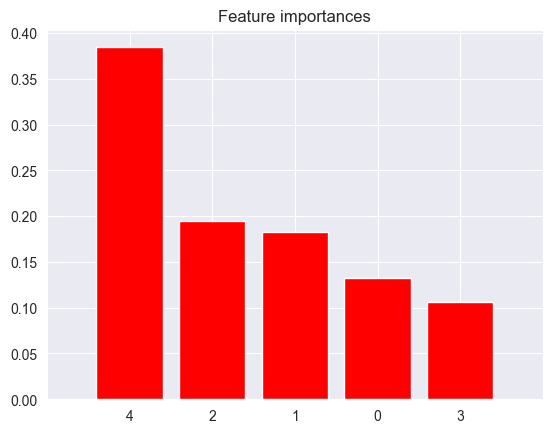

In [104]:
import matplotlib.pyplot as plt
importances = best_estimators["RandomForest"].named_steps["clf"].feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [105]:
from sklearn.model_selection import cross_val_score

# Dictionary untuk menyimpan cross-validation scores
cv_scores = {}

# Loop melalui model-model yang tersisa
for clf_name, clf_pipeline in best_estimators.items():
    # Mendapatkan model dari pipeline
    clf = clf_pipeline.named_steps["clf"]

    # Melakukan cross-validation
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

    # Menyimpan cross-validation scores
    cv_scores[clf_name] = scores

    # Menampilkan hasil cross-validation scores
    print(f"Cross-validation scores for {clf_name}: {scores}")
    print(f"Mean cross-validation score for {clf_name}: {scores.mean():.4f}")


Cross-validation scores for RandomForest: [0.80357143 0.91071429 0.875      0.87272727 0.8       ]
Mean cross-validation score for RandomForest: 0.8524
Cross-validation scores for Logistic: [0.83928571 0.83928571 0.80357143 0.81818182 0.78181818]
Mean cross-validation score for Logistic: 0.8164
Cross-validation scores for KNeighbors: [0.82142857 0.875      0.78571429 0.83636364 0.76363636]
Mean cross-validation score for KNeighbors: 0.8164
Cross-validation scores for DecisionTree: [0.80357143 0.78571429 0.76785714 0.81818182 0.8       ]
Mean cross-validation score for DecisionTree: 0.7951


E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when

Cross-validation scores for MLPClassifier: [0.82142857 0.80357143 0.85714286 0.87272727 0.81818182]
Mean cross-validation score for MLPClassifier: 0.8346
Cross-validation scores for SVC: [0.76785714 0.80357143 0.80357143 0.70909091 0.69090909]
Mean cross-validation score for SVC: 0.7550


<Axes: >

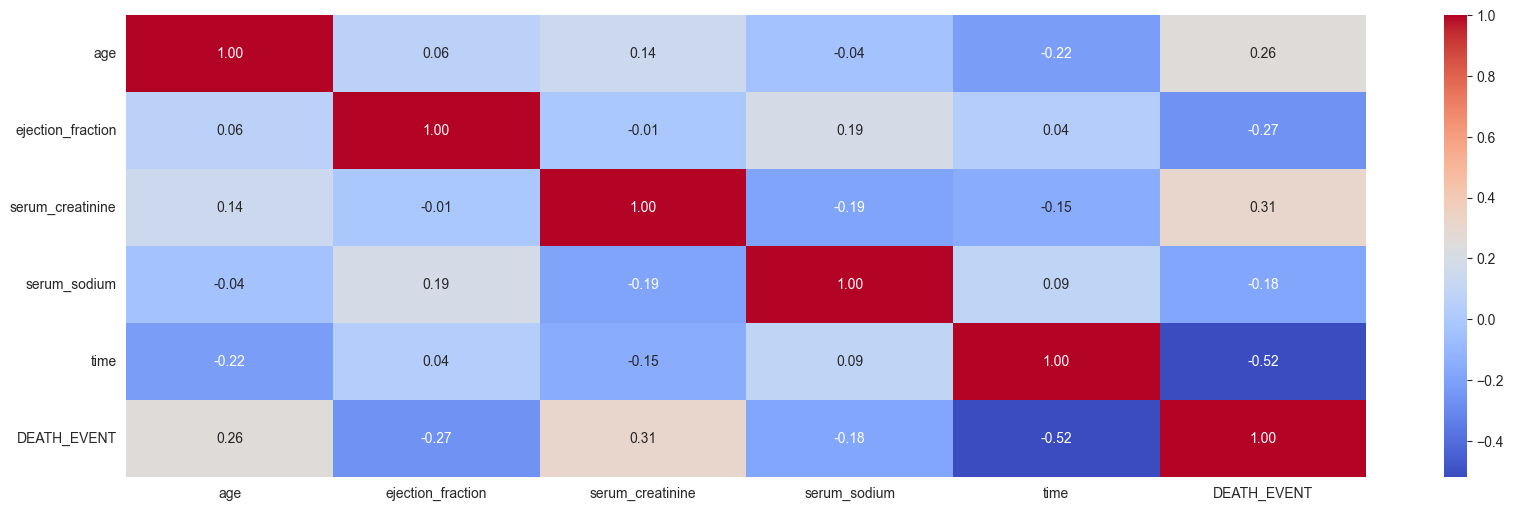

In [106]:
plt.figure(figsize=(20,6))
sns.heatmap(scaled_df_mod.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [107]:
Xs = scaled_df.drop(["DEATH_EVENT"], axis=1)
ys = scaled_df['DEATH_EVENT']

X_resamples, y_resamples = ADASYN(random_state=42).fit_resample(Xs, ys)
X_trains, X_tests, y_trains, y_tests = train_test_split(X_resamples,y_resamples,test_size = 0.2, random_state=42)

In [108]:
from sklearn.cross_decomposition import PLSRegression
import numpy as np

# Inisialisasi model PLS dengan jumlah komponen yang diinginkan
pls = PLSRegression(n_components=2)

# Latih model PLS pada data latih
pls.fit(X_train, y_train)

# Hitung skor VIP
vip_scores = np.sum(np.square(pls.x_weights_), axis=1) * np.sum(np.square(pls.y_loadings_), axis=1)
idx = np.argsort(vip_scores)
# Tampilkan skor VIP untuk setiap variabel
for i in idx:
    print(f"Variable {i}: VIP score = {vip_scores[i]:.4f}")


Variable 2: VIP score = 0.0559
Variable 0: VIP score = 0.1056
Variable 3: VIP score = 0.1316
Variable 1: VIP score = 0.1557
Variable 4: VIP score = 0.1696


In [110]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)